In [23]:
import os
import time
import torch
import timm
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from datetime import datetime
from PIL import Image

In [24]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

# Custom dataset folder
dataset_path = 'F:/vit_custom_img_classif/key_desc_org'  # Update this path
# dataset_path = 'dataset_ebs'

In [25]:
# Preset values
dropout_rate = 0.00
batch_size = 32
learning_rate = 1e-4
num_epochs = 10
image_size = 224

In [26]:
# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(degrees=(0, 360)),
    #transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    #transforms.RandomResizedCrop(size=image_size),
    #transforms.RandomPerspective(distortion_scale=0.5, probability=0.5),
    #transforms.RandomVerticalFlip(),
    #transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.8),
])

In [27]:
# Load custom dataset
dataset = datasets.ImageFolder(dataset_path, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

In [28]:
# Split dataset into training and validation sets
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [29]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [30]:
# List of Vit Models with Pretrained Weight
all_models = timm.list_models('*')
all_models

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [31]:
mypretrainedname = 'fastvit_ma36' #Put one of the model name listed in 7th cell

In [32]:
# Load pre-trained ViT model with specified dropout rate
model = timm.create_model(mypretrainedname, pretrained=True, num_classes=num_classes, drop_rate=dropout_rate)
model = model.to(device)

In [33]:
# Loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
# Summary info before training loop
print(f"Custom dataset folder: {dataset_path}")
print(f"Number of classes: {num_classes} with class names: {class_names}")
print(f"Preset dropout rate: {dropout_rate}")
print(f"Training/Testing Ratio: {train_size}/{val_size}")
print(f"Learning rate: {learning_rate}")

Custom dataset folder: F:/vit_custom_img_classif/key_desc_org
Number of classes: 17 with class names: ['Big Bump', 'Bridged', 'Chemical residue', 'Deformed Bump', 'Deformed Bump Top', 'Foreign Material', 'Good FM', 'Good No Image', 'Good bump edge', 'Good bump top', 'Good center image', 'IQC Defects', 'Metal Residue', 'Missing bump', 'PI defect', 'Scratches', 'Small Bump']
Preset dropout rate: 0.0
Training/Testing Ratio: 19151/8208
Learning rate: 0.0001


In [35]:
# Training and validation
train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

In [ ]:
# Continue training start here
start_time = time.time()  # Start time of the training

for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Start time of the current epoch

    # [Your existing training and validation code goes here]

    # Calculate average losses and accuracy
    # [Your existing code for calculating and storing training/validation losses and accuracies]
    # Training
    model.train()
    train_loss, train_correct = 0.0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predictions = torch.max(outputs, 1)
        train_correct += torch.sum(predictions == labels.data)
    
    # Validation
    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predictions = torch.max(outputs, 1)
            val_correct += torch.sum(predictions == labels.data)
    
    # Calculate average losses and accuracy
    train_loss = train_loss / train_size
    train_acc = train_correct.double() / train_size
    val_loss = val_loss / val_size
    val_acc = val_correct.double() / val_size

    # Save history for plotting
    train_acc_history.append(train_acc.cpu().numpy())
    train_loss_history.append(train_loss)
    val_acc_history.append(val_acc.cpu().numpy())
    val_loss_history.append(val_loss)

    
    epoch_time = time.time() - epoch_start_time  # Time taken for the current epoch
    total_time = time.time() - start_time  # Total time elapsed since the start of training
    avg_time_per_epoch = total_time / (epoch + 1)  # Average time per epoch
    remaining_epochs = num_epochs - epoch - 1
    estimated_remaining_time = avg_time_per_epoch * remaining_epochs

    # Convert estimated remaining time from seconds to minutes
    estimated_remaining_time_min = estimated_remaining_time / 60

    # Print results every epoch with estimated remaining time
    print(f"Epoch {epoch+1}/{num_epochs}.. "
          f"Train loss: {train_loss:.4f}.. "
          f"Train accuracy: {train_acc:.4f}.. "
          f"Val loss: {val_loss:.4f}.. "
          f"Val accuracy: {val_acc:.4f}.. "
          f"Remaining time: {estimated_remaining_time_min:.2f} minutes")

Epoch 1/10.. Train loss: 0.4528.. Train accuracy: 0.8619.. Val loss: 0.1831.. Val accuracy: 0.9446.. Remaining time: 62.91 minutes
Epoch 2/10.. Train loss: 0.1350.. Train accuracy: 0.9571.. Val loss: 0.1254.. Val accuracy: 0.9559.. Remaining time: 55.63 minutes


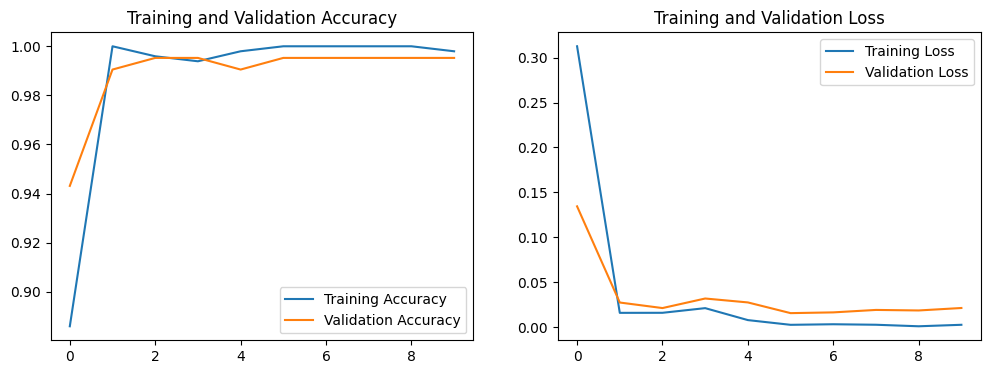

In [15]:
# Plot trend chart for Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# Save the model
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_save_path = os.path.join(dataset_path, f'model_{timestamp}.pth')
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to dataset_ebs\model_20231225_081107.pth


In [17]:
# Predict Function
def predict_image(image_path, model, device, transform, class_names):
    image = Image.open(image_path).convert('RGB')
    inputs = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        confidence = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
    _, predicted_confidence = torch.max(confidence, 0)
    
    plt.imshow(image)
    plt.title(f"{class_names[predicted]} ({confidence[predicted].item():.2f}%)") #({confidence[predicted]:.2f}%)
    plt.show()

In [18]:
# Load the model weights 
filename = model_save_path
#filename = dataset_path + "/" + "model_20231220_105848.pth"

loaded_weights = torch.load(filename)

# load the weights 
model.load_state_dict(loaded_weights)

<All keys matched successfully>

In [19]:
print (class_names)

['goods', 'rejects']


In [20]:
#import torch
#import os
#from PIL import Image
#import matplotlib.pyplot as plt

# Your existing predict_image function
def predict_image(image_path, model, device, transform, class_names):
    image = Image.open(image_path).convert('RGB')
    inputs = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        confidence = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
    return class_names[predicted[0]], confidence[predicted[0]].item(), image


In [21]:
# Function to process each folder and its images with misclassification count and percentage
def process_folders(image_folder_path, model, device, transform, class_names):
    total_images = 0
    misclassified_images = 0

    for class_folder in os.listdir(image_folder_path):
        folder_path = os.path.join(image_folder_path, class_folder)
        if os.path.isdir(folder_path):
            for image_file in os.listdir(folder_path):
                total_images += 1
                image_path = os.path.join(folder_path, image_file)
                predicted_label, confidence, image = predict_image(image_path, model, device, transform, class_names)
                
                # Count and show image if misclassified
                if predicted_label != class_folder:
                    misclassified_images += 1
                    plt.imshow(image)
                    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%), Actual: {class_folder}")
                    plt.show()

    # Calculate and display misclassification results
    if total_images > 0:
        misclassification_percentage = (misclassified_images / total_images) * 100
        print(f"Total Images: {total_images}")
        print(f"Misclassified Images: {misclassified_images}")
        print(f"Misclassification Percentage: {misclassification_percentage:.2f}%")
    else:
        print("No images found in the provided folder.")

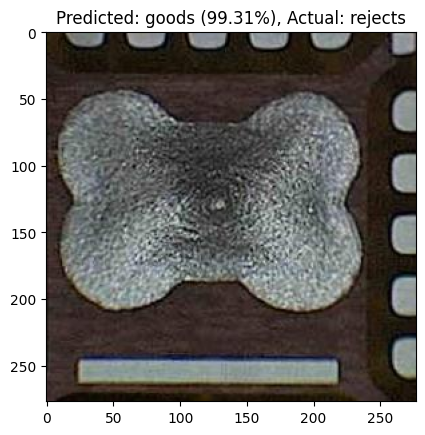

Total Images: 702
Misclassified Images: 1
Misclassification Percentage: 0.14%


In [22]:
# Example usage
image_folder_path = dataset_path #'path_to_your_image_folder'
# model, device, transform, and class_names need to be defined as per your model and dataset
process_folders(image_folder_path, model, device, transform, class_names)
